# Pumpkin Seed Assignment - Group 6

Team members:
 - Phuong Le
 - Hiep Huynh
 - Xin Feng

## Information about the dataset

The dataset:
- Features: 13 features
- Target:  2 pumpkin class: Çerçevelik, Ürgüp Sivrisi
  
Pumpkin seeds dataset https://www.kaggle.com/datasets/muratkokludataset/pumpkin-seeds-dataset/data

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

In [2]:
# load the dataset
seed = pd.read_excel('Pumpkin_Seeds_Dataset.xlsx')
seed.head()

Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  Convex_Area  \
0  56276    888.242           326.1485           220.2388        56831   
1  76631   1068.146           417.1932           234.2289        77280   
2  71623   1082.987           435.8328           211.0457        72663   
3  66458    992.051           381.5638           222.5322        67118   
4  66107    998.146           383.8883           220.4545        67117   

   Equiv_Diameter  Eccentricity  Solidity  Extent  Roundness  Aspect_Ration  \
0        267.6805        0.7376    0.9902  0.7453     0.8963         1.4809   
1        312.3614        0.8275    0.9916  0.7151     0.8440         1.7811   
2        301.9822        0.8749    0.9857  0.7400     0.7674         2.0651   
3        290.8899        0.8123    0.9902  0.7396     0.8486         1.7146   
4        290.1207        0.8187    0.9850  0.6752     0.8338         1.7413   

   Compactness       Class  
0       0.8207  Çerçevelik  
1       0.7487  Çerçevelik  
2       0.6929  Çerçevelik  
3       0.7624  Çerçevelik  
4       0.7557  Çerçevelik

In [3]:
# check the data information
seed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB


In [4]:
# check if there is any null value
seed.isnull().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Convex_Area          0
Equiv_Diameter       0
Eccentricity         0
Solidity             0
Extent               0
Roundness            0
Aspect_Ration        0
Compactness          0
Class                0
dtype: int64

In [5]:
seed.iloc[:,-1]

0          Çerçevelik
1          Çerçevelik
2          Çerçevelik
3          Çerçevelik
4          Çerçevelik
            ...      
2495    Ürgüp Sivrisi
2496    Ürgüp Sivrisi
2497    Ürgüp Sivrisi
2498    Ürgüp Sivrisi
2499    Ürgüp Sivrisi
Name: Class, Length: 2500, dtype: object

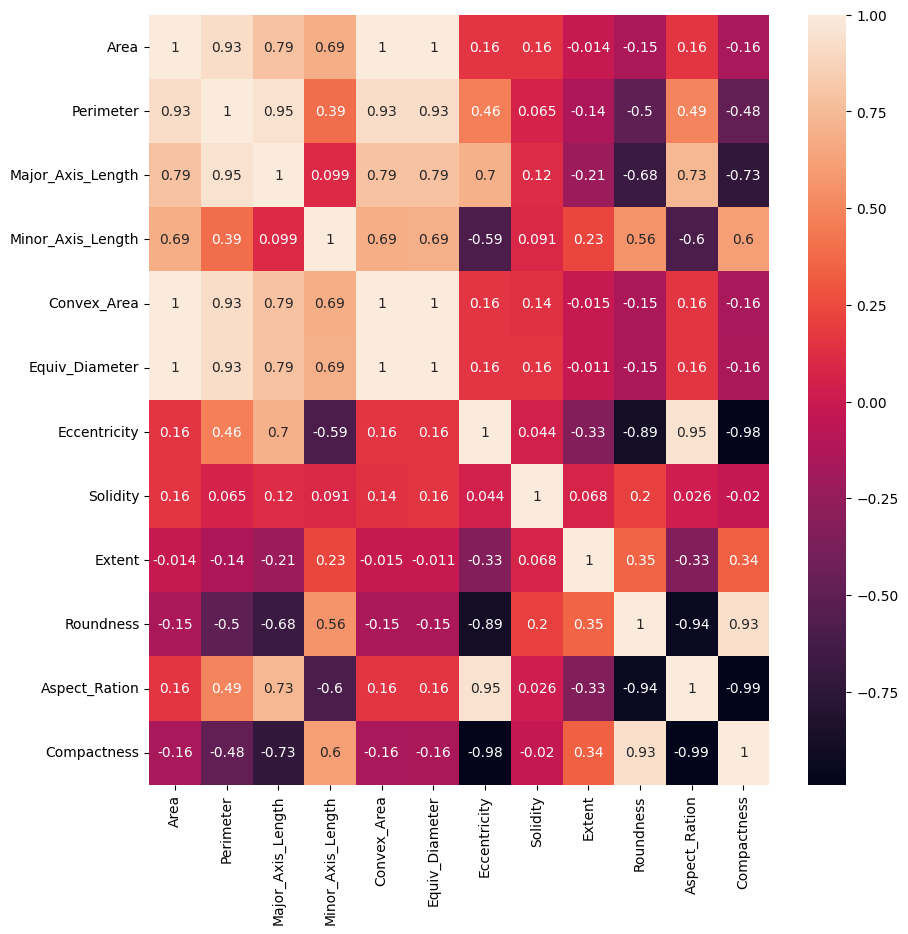

In [6]:
#Correlation map
seed_corr = seed.iloc[:,:-1].corr()
fig,ax = plt.subplots(figsize = (10,10))
sns.heatmap(seed_corr, annot=True,ax=ax)
plt.show()


In [7]:
#check out the column names
seed.columns

Index(['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Convex_Area', 'Equiv_Diameter', 'Eccentricity', 'Solidity', 'Extent',
       'Roundness', 'Aspect_Ration', 'Compactness', 'Class'],
      dtype='object')

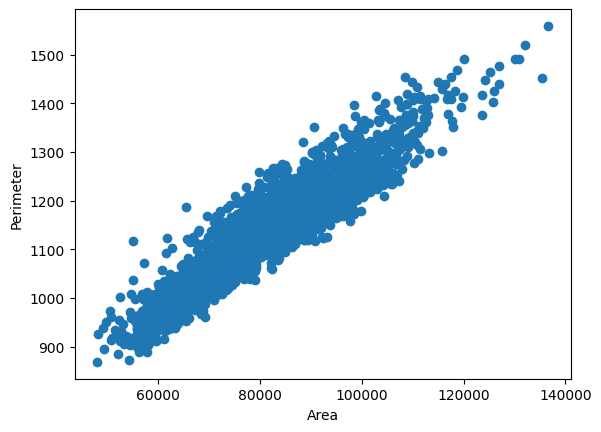

In [8]:
#Visualizing the dataset 
plt.scatter(seed['Area'],seed['Perimeter'])
plt.xlabel('Area')
plt.ylabel('Perimeter')
plt.show()

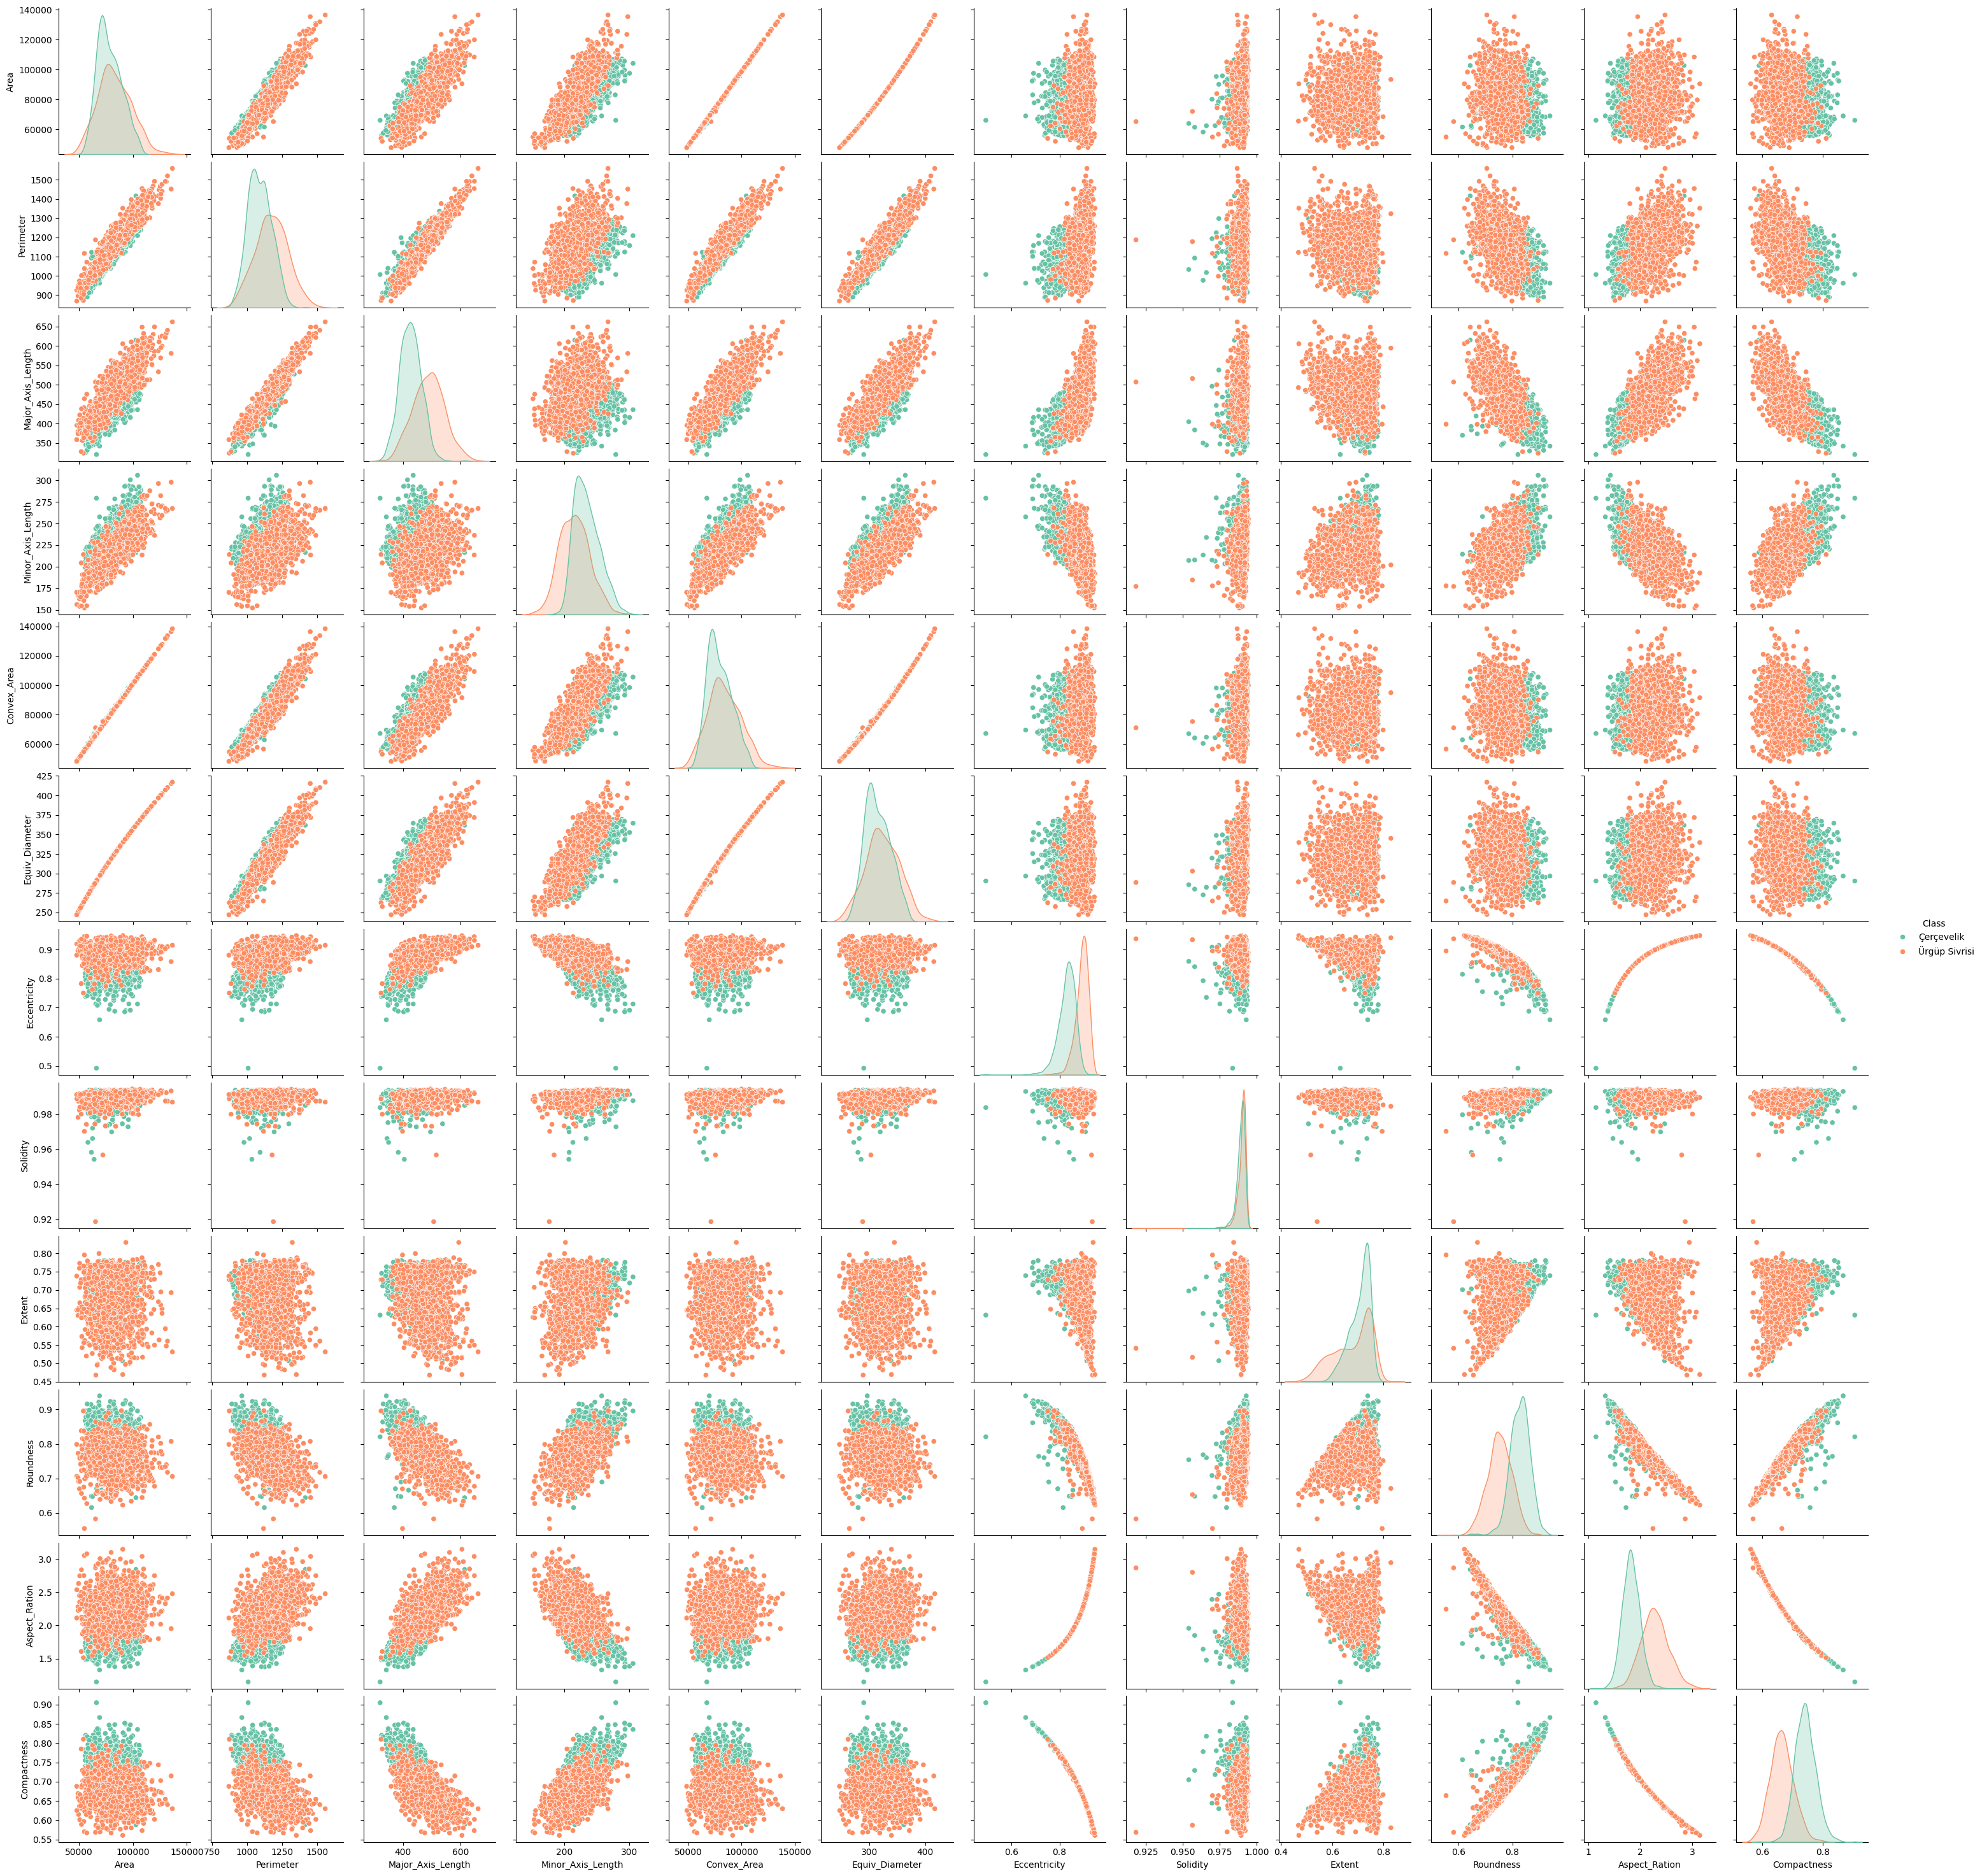

In [9]:
# Visualize all features and target
sns.pairplot(seed, hue='Class', diag_kind='kde', palette='Set2')
plt.show()

## The label variable

In [10]:
# Check unique values in the class column
seed['Class'].unique()

array(['Çerçevelik', 'Ürgüp Sivrisi'], dtype=object)

In [11]:
# Area, Perimeter, Major_Axis_Length, Minor_Axis_Length, Convex_Area, Equiv_Diameter, Eccentricity,
# Solidity, Extent, Roundness, Aspect_Ration, Compactness, Class
# Encoding the class column using get_dummies, use drop_first to merge the column to one instead of having two
seed = pd.get_dummies(seed,drop_first = True)
#Rename the column name
seed.rename(columns = {'Class_Ürgüp Sivrisi': 'Class'}, inplace = True)
seed.head()

Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  Convex_Area  \
0  56276    888.242           326.1485           220.2388        56831   
1  76631   1068.146           417.1932           234.2289        77280   
2  71623   1082.987           435.8328           211.0457        72663   
3  66458    992.051           381.5638           222.5322        67118   
4  66107    998.146           383.8883           220.4545        67117   

   Equiv_Diameter  Eccentricity  Solidity  Extent  Roundness  Aspect_Ration  \
0        267.6805        0.7376    0.9902  0.7453     0.8963         1.4809   
1        312.3614        0.8275    0.9916  0.7151     0.8440         1.7811   
2        301.9822        0.8749    0.9857  0.7400     0.7674         2.0651   
3        290.8899        0.8123    0.9902  0.7396     0.8486         1.7146   
4        290.1207        0.8187    0.9850  0.6752     0.8338         1.7413   

   Compactness  Class  
0       0.8207  False  
1       0.7487  False  
2       0.6929  False  
3       0.7624  False  
4       0.7557  False

In [12]:
# Split the data into features and target variable
X = seed.drop('Class',axis=1)
y = seed['Class']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [13]:
print("Raw X_train variance:", X_train.var())
print("Scaled X_train variance:", StandardScaler().fit_transform(X_train).var())

Raw X_train variance: Area                 1.851355e+08
Perimeter            1.207121e+04
Major_Axis_Length    3.203800e+03
Minor_Axis_Length    5.366460e+02
Convex_Area          1.879798e+08
Equiv_Diameter       7.219711e+02
Eccentricity         2.047937e-03
Solidity             1.253884e-05
Extent               3.626060e-03
Roundness            3.159937e-03
Aspect_Ration        1.008249e-01
Compactness          2.863930e-03
dtype: float64
Scaled X_train variance: 1.0


## Model 1: Linear SVM

### Linear SVM without Scale

In [14]:
# Create a basic linear SVM model
from sklearn.metrics import accuracy_score
# Soft margin SVM (low C)
C = [0.01, 0.1, 0.5, 1.0, 10, 100]
max_accuracy = 0
best_c_0 = None
for c in C:
    soft_svm = SVC(kernel='linear', C=c)
    soft_svm.fit(X_train, y_train)
    y_pred_soft = soft_svm.predict(X_valid)
    acc = accuracy_score(y_valid, y_pred_soft)
    print(f"Accuracy at c = {c}: {acc:.3f}")
    if acc > max_accuracy:
        max_accuracy = acc
        best_c = c
        

print("")
print("Soft Margin Linear SVM")
print(f"Best Accuracy at c = {best_c}: {max_accuracy:.3f}")
print(classification_report(y_valid, y_pred_soft))
print(confusion_matrix(y_valid, y_pred_soft))

Accuracy at c = 0.01: 0.862
Accuracy at c = 0.1: 0.862
Accuracy at c = 0.5: 0.858
Accuracy at c = 1.0: 0.854
Accuracy at c = 10: 0.850
Accuracy at c = 100: 0.854

Soft Margin Linear SVM
Best Accuracy at c = 0.01: 0.862
              precision    recall  f1-score   support

       False       0.85      0.88      0.87       272
        True       0.85      0.82      0.84       228

    accuracy                           0.85       500
   macro avg       0.85      0.85      0.85       500
weighted avg       0.85      0.85      0.85       500

[[240  32]
 [ 41 187]]


### Linear SVM with Scale

In [15]:
C = [0.01, 0.1, 1.0, 5.0, 10, 100.0]
max_accuracy = 0
best_c = None
for c in C:
    svm_pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('svm', SVC(kernel='linear', C=c))
    ])

    svm_pipe.fit(X_train, y_train)
    y_pred = svm_pipe.predict(X_valid)
    acc = accuracy_score(y_valid, y_pred)
    print(f"Accuracy at c = {c}: {acc:.3f}")
    if acc > max_accuracy:
        max_accuracy = acc
        best_c = c
    
print("")
print("Linear SVM with scaled data")
print(f"Best Accuracy at c = {best_c}: {max_accuracy:.3f}")
print(classification_report(y_valid, y_pred_soft))
print(confusion_matrix(y_valid, y_pred_soft))

Accuracy at c = 0.01: 0.862
Accuracy at c = 0.1: 0.866
Accuracy at c = 1.0: 0.862
Accuracy at c = 5.0: 0.874
Accuracy at c = 10: 0.870
Accuracy at c = 100.0: 0.864

Linear SVM with scaled data
Best Accuracy at c = 5.0: 0.874
              precision    recall  f1-score   support

       False       0.85      0.88      0.87       272
        True       0.85      0.82      0.84       228

    accuracy                           0.85       500
   macro avg       0.85      0.85      0.85       500
weighted avg       0.85      0.85      0.85       500

[[240  32]
 [ 41 187]]


### The Best Linear SVM

In [16]:
# We apply the grid search to find the best parameters for the SVM model
# We didn't use `gamma='scale'` here because in the official documentation,
# there is no `gamma` parameter for the linear kernel.
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

svm_grid_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='linear'))
])

grid = GridSearchCV(svm_grid_pipe, {
    'svm__C': [0.01, 0.1, 1, 10, 100, 1000],
}, cv=5, n_jobs=-1, scoring='accuracy')

grid.fit(X_train, y_train)
print("Best parameters found: ", grid.best_params_)
y_pred = grid.best_estimator_.predict(X_valid)
print("Test accuracy:", accuracy_score(y_valid, y_pred))

Best parameters found:  {'svm__C': 100}
Test accuracy: 0.864


### Apply The Best SVM

Best SVM with scaled data
Accuracy: 0.864
              precision    recall  f1-score   support

       False       0.84      0.92      0.88       272
        True       0.90      0.79      0.84       228

    accuracy                           0.86       500
   macro avg       0.87      0.86      0.86       500
weighted avg       0.87      0.86      0.86       500

[[251  21]
 [ 47 181]]


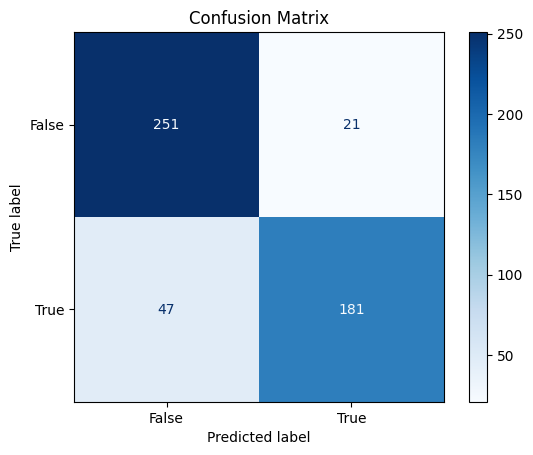

In [17]:
# We use the best parameters to create a new SVM model
best_svm_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='linear', C = 100))
])

best_svm_pipe.fit(X_train, y_train)
y_pred = best_svm_pipe.predict(X_valid)

print("Best SVM with scaled data")
print("Accuracy:", accuracy_score(y_valid, y_pred))
print(classification_report(y_valid, y_pred))
print(confusion_matrix(y_valid, y_pred))
# Plot the confusion matrix
cm = confusion_matrix(y_valid, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_svm_pipe.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()



## Model 2: Polynomial SVM

### Polynomial without Scale

In [18]:
C = [1.0, 5.0, 10.0, 15.0, 100.0]
max_accuracy = 0
best_c = None
best_d = None
deg = [2, 3, 4, 5]
for c in C:
    for d in deg:
        svm_poly = SVC(kernel='poly', degree=d, C=c, gamma='scale')
        svm_poly.fit(X_train, y_train)
        y_pred = svm_poly.predict(X_valid)
        acc = accuracy_score(y_valid, y_pred)
        print(f"Accuracy at degree = {d}, c = {c}: {acc:.3f}")
        if acc > max_accuracy:
            max_accuracy = acc
            best_c = c
            best_d = d
print("*****************************")
print("Polynomial SVM")
print(f"Max Accuracy at degree = {best_d}, c = {best_c}: {max_accuracy:.3f}")
print("*****************************")
print("Raw X_train variance:", X_train.var())
print("Scaled X_train variance:", StandardScaler().fit_transform(X_train).var())

Accuracy at degree = 2, c = 1.0: 0.578
Accuracy at degree = 3, c = 1.0: 0.574
Accuracy at degree = 4, c = 1.0: 0.566
Accuracy at degree = 5, c = 1.0: 0.566
Accuracy at degree = 2, c = 5.0: 0.584
Accuracy at degree = 3, c = 5.0: 0.578
Accuracy at degree = 4, c = 5.0: 0.570
Accuracy at degree = 5, c = 5.0: 0.572
Accuracy at degree = 2, c = 10.0: 0.586
Accuracy at degree = 3, c = 10.0: 0.582
Accuracy at degree = 4, c = 10.0: 0.578
Accuracy at degree = 5, c = 10.0: 0.582
Accuracy at degree = 2, c = 15.0: 0.586
Accuracy at degree = 3, c = 15.0: 0.586
Accuracy at degree = 4, c = 15.0: 0.582
Accuracy at degree = 5, c = 15.0: 0.594
Accuracy at degree = 2, c = 100.0: 0.604
Accuracy at degree = 3, c = 100.0: 0.626
Accuracy at degree = 4, c = 100.0: 0.648
Accuracy at degree = 5, c = 100.0: 0.680
*****************************
Polynomial SVM
Max Accuracy at degree = 5, c = 100.0: 0.680
*****************************
Raw X_train variance: Area                 1.851355e+08
Perimeter            1.20712

### Polynomial SVM with Scaled data

In [19]:
C = [0.1, 1.0, 5.0, 10.0, 15.0, 100.0]
max_accuracy = 0
best_c = None
best_d = None
deg = [2, 3, 4, 5]

for c in C:
    for d in deg:
        svm_poly_pipe = Pipeline([
            ('scaler', StandardScaler()),
            ('svm', SVC(kernel='poly', degree=d, C=c, gamma='scale'))
        ])
        svm_poly_pipe.fit(X_train, y_train)
        y_pred = svm_poly_pipe.predict(X_valid)
        acc = accuracy_score(y_valid, y_pred)
        print(f"Accuracy at degree = {d}, c = {c}: {acc:.3f}")
        if acc > max_accuracy:
            max_accuracy = acc
            best_c = c
            best_d = d
print("*******************************")
print("Polynomial SVM with scaled data")

print(f"Accuracy at degree = {best_d}, c = {best_c}: {max_accuracy}", )

Accuracy at degree = 2, c = 0.1: 0.690
Accuracy at degree = 3, c = 0.1: 0.804
Accuracy at degree = 4, c = 0.1: 0.694
Accuracy at degree = 5, c = 0.1: 0.748
Accuracy at degree = 2, c = 1.0: 0.766
Accuracy at degree = 3, c = 1.0: 0.824
Accuracy at degree = 4, c = 1.0: 0.748
Accuracy at degree = 5, c = 1.0: 0.774
Accuracy at degree = 2, c = 5.0: 0.802
Accuracy at degree = 3, c = 5.0: 0.830
Accuracy at degree = 4, c = 5.0: 0.782
Accuracy at degree = 5, c = 5.0: 0.796
Accuracy at degree = 2, c = 10.0: 0.804
Accuracy at degree = 3, c = 10.0: 0.836
Accuracy at degree = 4, c = 10.0: 0.786
Accuracy at degree = 5, c = 10.0: 0.802
Accuracy at degree = 2, c = 15.0: 0.812
Accuracy at degree = 3, c = 15.0: 0.842
Accuracy at degree = 4, c = 15.0: 0.790
Accuracy at degree = 5, c = 15.0: 0.808
Accuracy at degree = 2, c = 100.0: 0.862
Accuracy at degree = 3, c = 100.0: 0.840
Accuracy at degree = 4, c = 100.0: 0.824
Accuracy at degree = 5, c = 100.0: 0.810
*******************************
Polynomial SVM w

### Best Polynomial SVM Hyperparameter

In [20]:
svm_poly_grid_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='poly'))
])
grid = GridSearchCV(svm_poly_grid_pipe, {
    'svm__C': [0.1, 1, 10, 100, 1000],
    'svm__degree': [2, 3, 4, 5],
    'svm__gamma': ['scale', 'auto'],
    'svm__coef0': [0.0, 0.1, 0.5, 1.0]
}, cv=5, n_jobs=-1, scoring='accuracy')
grid.fit(X_train, y_train)
print("Best parameters found: ", grid.best_params_)
y_pred = grid.best_estimator_.predict(X_valid)
print("Test accuracy:", accuracy_score(y_valid, y_pred))

Best parameters found:  {'svm__C': 100, 'svm__coef0': 1.0, 'svm__degree': 3, 'svm__gamma': 'scale'}
Test accuracy: 0.88


### Apply Best Polynomial SVM

Best Polynomial SVM with scaled data
Accuracy: 0.88
              precision    recall  f1-score   support

       False       0.85      0.94      0.90       272
        True       0.92      0.81      0.86       228

    accuracy                           0.88       500
   macro avg       0.89      0.87      0.88       500
weighted avg       0.88      0.88      0.88       500



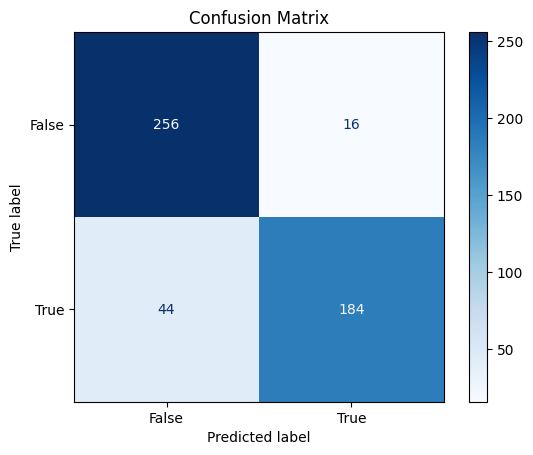

In [21]:
best_svm_poly_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='poly', C=100, degree=3, gamma='scale', coef0=1.0))
])

best_svm_poly_pipe.fit(X_train, y_train)
y_pred = best_svm_poly_pipe.predict(X_valid)
print("Best Polynomial SVM with scaled data")
print("Accuracy:", accuracy_score(y_valid, y_pred))

# Classification report
print(classification_report(y_valid, y_pred))
# Confusion matrix
cm = confusion_matrix(y_valid, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_svm_poly_pipe.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

## Model 3: RBF SVM

### Basic RBF SVM

In [22]:
C = [1.0, 5.0, 10.0, 15.0, 100.0, 1000.0]
max_accuracy = 0
best_c = None
for c in C:
    rbf_svm = SVC(kernel='rbf', C=c, gamma='scale')
    rbf_svm.fit(X_train, y_train)
    y_pred_rbf = rbf_svm.predict(X_valid)
    acc = accuracy_score(y_valid, y_pred_rbf)
    print(f"Accuracy at c = {c}: {acc}")
    if acc > max_accuracy:
        max_accuracy = acc
        best_c = c

print("**************************")
print("Radial Basis Function SVM")
print(f"Max Accuracy at C = {best_c}: {max_accuracy:.3f}")
print(classification_report(y_valid, y_pred_rbf))
print(confusion_matrix(y_valid, y_pred_rbf))

Accuracy at c = 1.0: 0.566
Accuracy at c = 5.0: 0.574
Accuracy at c = 10.0: 0.572
Accuracy at c = 15.0: 0.578
Accuracy at c = 100.0: 0.61
Accuracy at c = 1000.0: 0.712
**************************
Radial Basis Function SVM
Max Accuracy at C = 1000.0: 0.712
              precision    recall  f1-score   support

       False       0.69      0.86      0.76       272
        True       0.76      0.54      0.63       228

    accuracy                           0.71       500
   macro avg       0.73      0.70      0.70       500
weighted avg       0.72      0.71      0.70       500

[[234  38]
 [106 122]]


### RBF SVM with Scale

In [23]:
C = [1.0, 5.0, 10.0, 15.0, 100.0, 1000.0]
max_accuracy = 0
best_c = None
best_model = None
for c in C:
    svm_rbf_pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('svm', SVC(kernel='rbf', C=c, gamma='scale'))
    ])
    svm_rbf_pipe.fit(X_train, y_train)
    y_pred = svm_rbf_pipe.predict(X_valid)
    acc = accuracy_score(y_valid, y_pred)
    print(f"Accuracy at c = {c}: {acc:.3f}")
    if acc > max_accuracy:
        max_accuracy = acc
        best_c = c
        best_model = svm_rbf_pipe
print(f"***********************************")
print(f"RBF SVM with scaled data")

print(f"Max Accuracy at c = {best_c}: {max_accuracy:.3f}")

Accuracy at c = 1.0: 0.876
Accuracy at c = 5.0: 0.886
Accuracy at c = 10.0: 0.886
Accuracy at c = 15.0: 0.886
Accuracy at c = 100.0: 0.866
Accuracy at c = 1000.0: 0.860
***********************************
RBF SVM with scaled data
Max Accuracy at c = 5.0: 0.886


### Best RBF SVM

In [24]:
grid_rbf_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf'))
])
grid = GridSearchCV(grid_rbf_pipe, {
    'svm__C': [0.1, 0.5, 1.0, 5.0, 100.0, 1000.0],
    'svm__gamma': ['scale', 'auto'],
}, cv=5, n_jobs=-1, scoring='accuracy')
grid.fit(X_train, y_train)
print("Best parameters found: ", grid.best_params_)
y_pred = grid.predict(X_valid)
print("Test accuracy:", accuracy_score(y_valid, y_pred))

Best parameters found:  {'svm__C': 1.0, 'svm__gamma': 'scale'}
Test accuracy: 0.876


### Apply Best RBF SVM

Best RBF SVM with scaled data
Accuracy: 0.876
              precision    recall  f1-score   support

       False       0.86      0.92      0.89       272
        True       0.90      0.82      0.86       228

    accuracy                           0.88       500
   macro avg       0.88      0.87      0.87       500
weighted avg       0.88      0.88      0.88       500



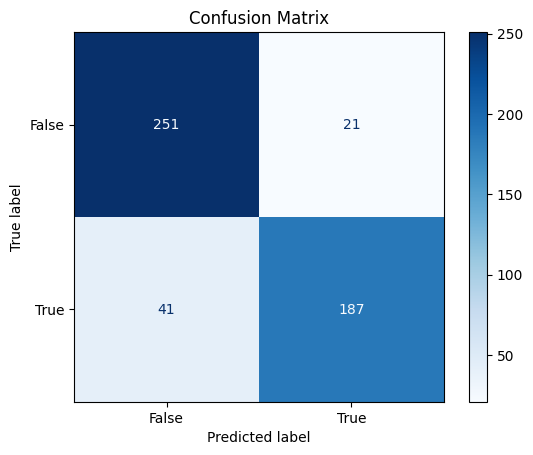

In [25]:
best_svm_rbf_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', C=1.0, gamma='scale'))
])

best_svm_rbf_pipe.fit(X_train, y_train)
y_pred = best_svm_rbf_pipe.predict(X_valid)
print("Best RBF SVM with scaled data")
print("Accuracy:", accuracy_score(y_valid, y_pred))

# Classification report
print(classification_report(y_valid, y_pred))
# Confusion matrix
cm = confusion_matrix(y_valid, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_svm_rbf_pipe.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

## Conclusion

As the data shown, we can see:



1 For SVM, applying the dataset scaling is important, especially for `Polynomial` and `RBF` kernel.

2 And the accuracy of `Polynomial` kernel and `RBF` kernel were almost similar, but the `RBF` kernel ran faster than `Polynomial` kernel, so `RBF` won the best model.

### Train on Test Dataset

Best model test accuracy: 0.894
              precision    recall  f1-score   support

       False       0.89      0.90      0.90       250
        True       0.90      0.88      0.89       250

    accuracy                           0.89       500
   macro avg       0.89      0.89      0.89       500
weighted avg       0.89      0.89      0.89       500



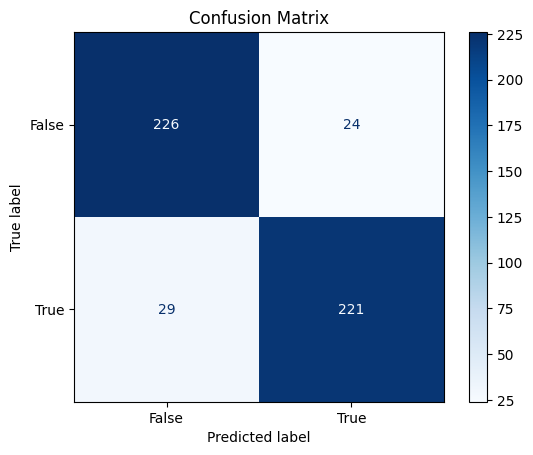

In [26]:
best_model = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', C=1.0, gamma='scale'))
])
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
print("Best model test accuracy:", accuracy_score(y_test, y_pred))
# Classification report
print(classification_report(y_test, y_pred))
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()